## Plot the BAO fit

In [1]:
import os
os.environ["MPICH_GPU_SUPPORT_ENABLED"] = "0"
import sys
import glob
import numpy as np
from getdist import plots
from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 12
# %config InlineBackend.figure_format = 'retina'
%matplotlib inline

from cosmoprimo.fiducial import DESI, AbacusSummit
from desilike.samples import plotting, Chain
from desilike import setup_logging
setup_logging()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
sys.path.append('/global/homes/s/shengyu/project_rc/main/Y3/')
from helper import REDSHIFT_VSMEAR, REDSHIFT_CUBICBOX, GET_RECON_BIAS
from helper import REDSHIFT_LSS_VSMEAR, REDSHIFT_LSS_CUBICBOX
from fit_cubic_tools import get_observable_likelihood, load_bins
from plotting_tools import plot_observable_bao, plot_mcmc_walkers, read_bao_chain

%load_ext autoreload
%autoreload 2

Z_VSMEAR = REDSHIFT_LSS_VSMEAR
Z_CUBIC = REDSHIFT_LSS_CUBICBOX
base_dir = '/pscratch/sd/s/shengyu/results/cubic'

[008545.80] [0/1] 03-24 06:43  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.4-0.6_standard.npy.
[008546.68] [0/1] 03-24 06:44  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.4-0.6_dv-obs.npy.
[008547.69] [0/1] 03-24 06:44  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.6-0.8_standard.npy.
[008548.55] [0/1] 03-24 06:44  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.6-0.8_dv-obs.npy.
[008549.38] [0/1] 03-24 06:44  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.8-1.1_standard.npy.
[008550.33] [0/1] 03-24 06:44  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.8-1.1_dv-obs.npy.


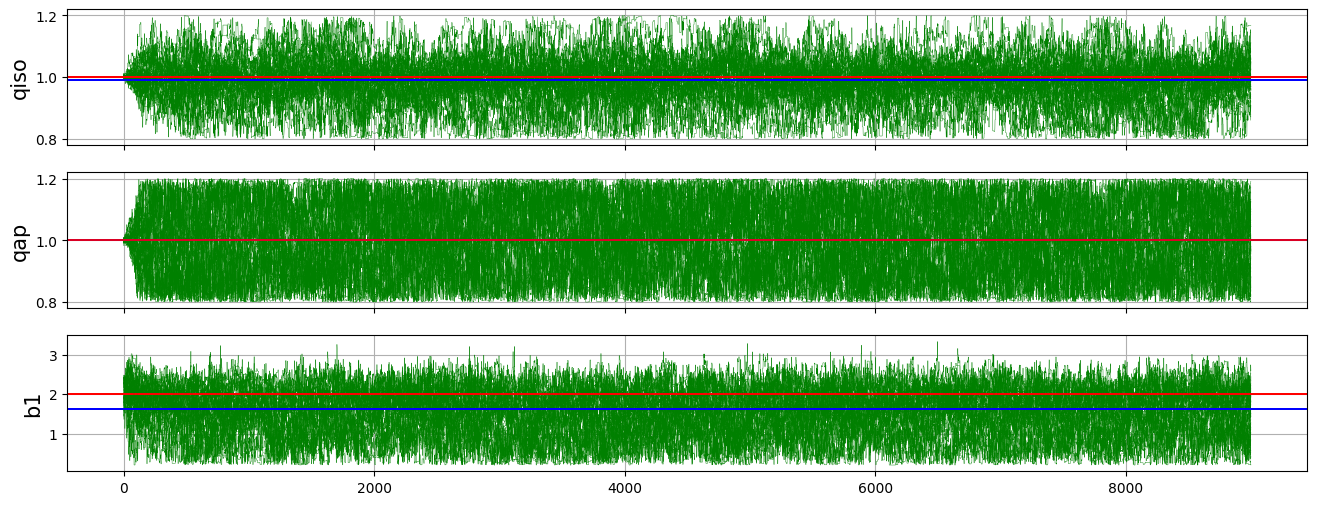

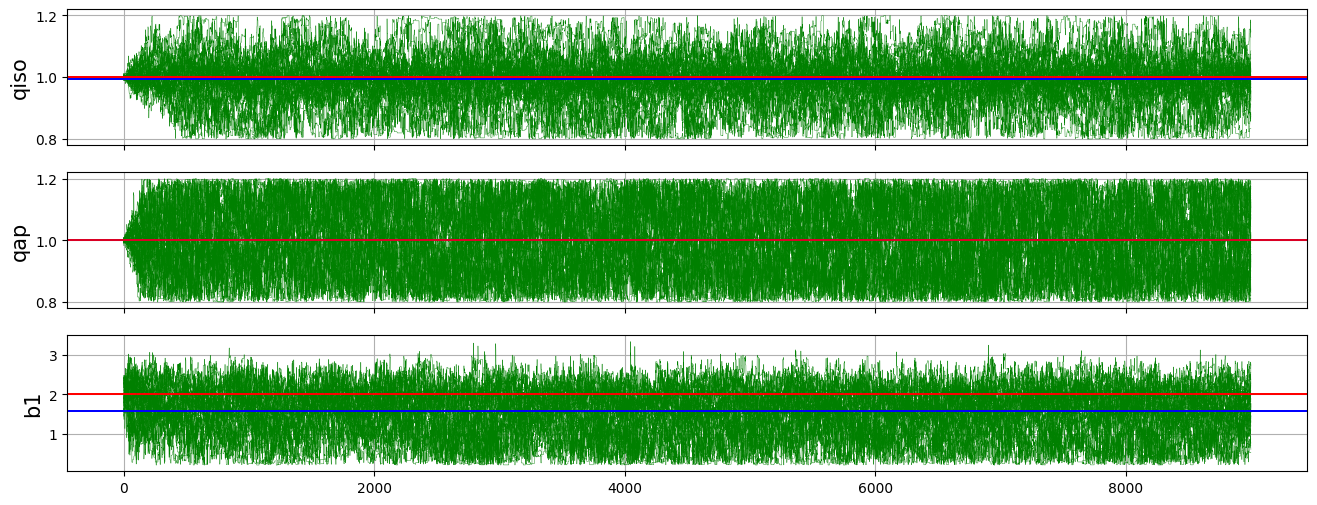

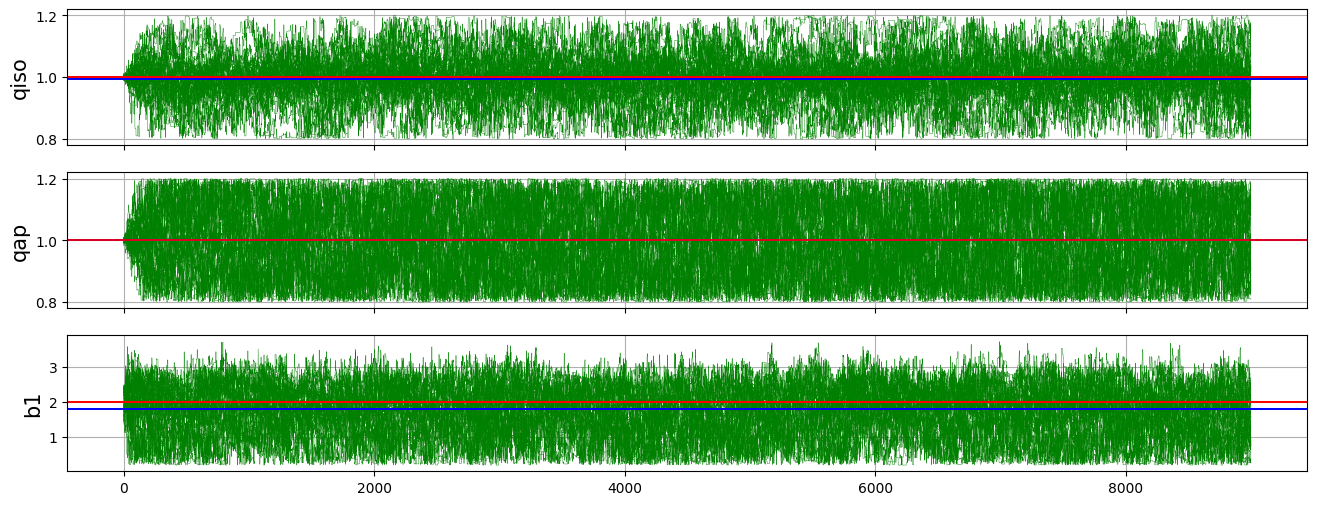

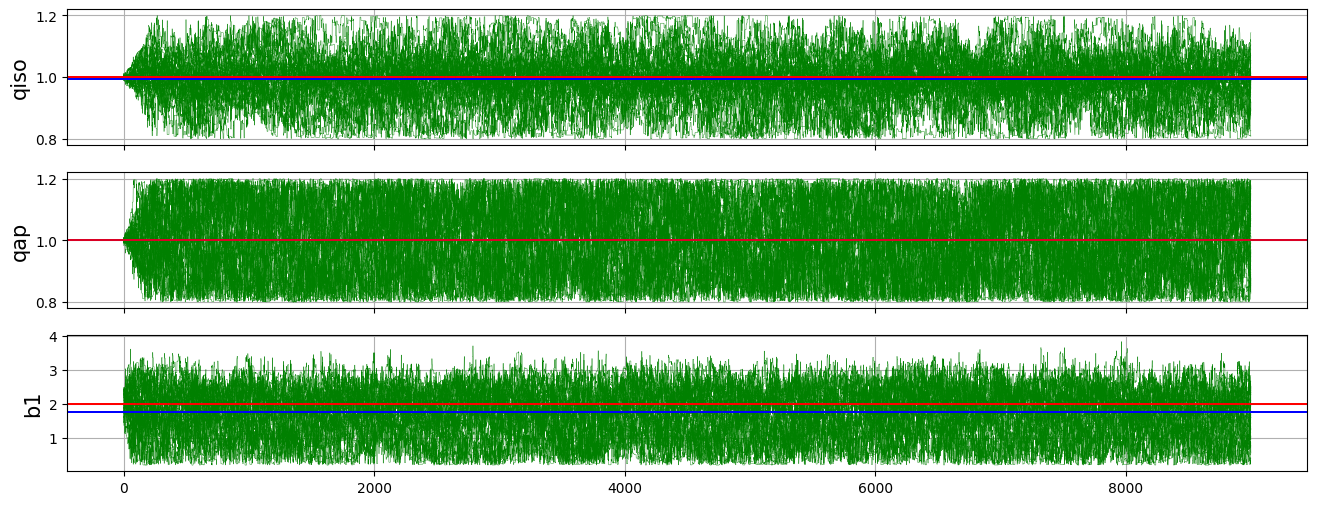

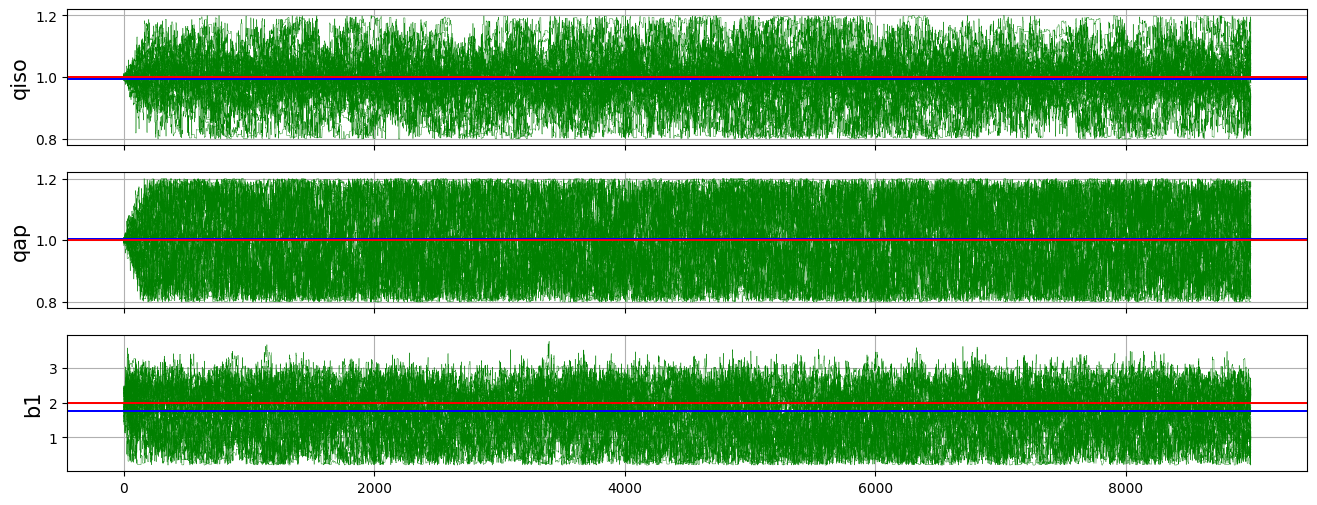

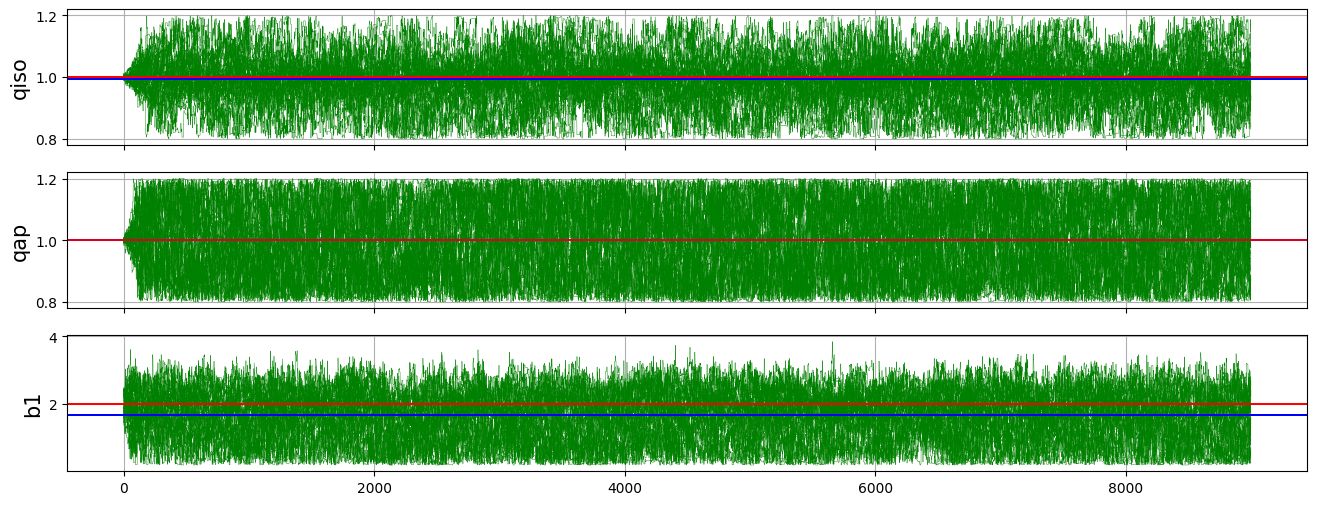

In [10]:
# First we plot the mcmc walker to see the convergence of parameters, 
# based on chain, decide where to cut the chain -- remove_burin
task = 'BAOfit_recon_cubic_sys'
tracer = 'LRG'
recon = True
sys_models = ['standard', 'dv-obs']
params  = ['qiso', 'b1'] if tracer in ['QSO', 'BGS'] else ['qiso', 'qap', 'b1']

for z_eff, (zmin, zmax) in zip(Z_CUBIC[tracer], Z_VSMEAR[tracer]):
    for sys_model in sys_models:
        chain_fn = base_dir+f'/BAO/chain_recon_{tracer}_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
        if tracer == 'QSO':
            chain = read_bao_chain(chain_fn, burnin = 0., apmode = 'qiso')
        else:
            chain = read_bao_chain(chain_fn, burnin = 0.)
        _, bias, _ = GET_RECON_BIAS(tracer)
        true_values = [1, bias] if tracer in ['QSO', 'BGS'] else [1, 1, bias]
        plot_mcmc_walkers(chain, params, nwalkers=48, true_values=true_values)

CovRsf: 0.294
[000947.42] [0/1] 03-21 01:35  TracerCorrelationFunctionMultipolesObservable INFO     Loading 25 files [/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph021/mpspk/xipoles_recon_ELG_z0.8-1.1_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph017/mpspk/xipoles_recon_ELG_z0.8-1.1_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph019/mpspk/xipoles_recon_ELG_z0.8-1.1_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph020/mpspk/xipoles_recon_ELG_z0.8-1.1_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph012/mpspk/xipoles_recon_ELG_z0.8-1.1_standard.npy].


/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000950.72] [0/1] 03-21 01:35  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_ELG_z0.8-1.1_standard.npy.
CovRsf: 0.294
[000978.08] [0/1] 03-21 01:35  TracerCorrelationFunctionMultipolesObservable INFO     Loading 25 files [/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph021/mpspk/xipoles_recon_ELG_z0.8-1.1_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph017/mpspk/xipoles_recon_ELG_z0.8-1.1_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph019/mpspk/xipoles_recon_ELG_z0.8-1.1_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph020/mpspk/xipoles_recon_ELG_z0.8-1.1_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/

/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000981.51] [0/1] 03-21 01:35  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_ELG_z0.8-1.1_dv-obs.npy.
CovRsf: 0.43
[001003.67] [0/1] 03-21 01:36  TracerCorrelationFunctionMultipolesObservable INFO     Loading 25 files [/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph021/mpspk/xipoles_recon_ELG_z1.1-1.6_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph017/mpspk/xipoles_recon_ELG_z1.1-1.6_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph019/mpspk/xipoles_recon_ELG_z1.1-1.6_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph020/mpspk/xipoles_recon_ELG_z1.1-1.6_standard.npy, ..., /pscratch/sd/s/shengyu/gala

/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[001007.12] [0/1] 03-21 01:36  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_ELG_z1.1-1.6_standard.npy.
CovRsf: 0.43
[001020.16] [0/1] 03-21 01:36  TracerCorrelationFunctionMultipolesObservable INFO     Loading 25 files [/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph021/mpspk/xipoles_recon_ELG_z1.1-1.6_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph017/mpspk/xipoles_recon_ELG_z1.1-1.6_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph019/mpspk/xipoles_recon_ELG_z1.1-1.6_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z1.1-1.6/AbacusSummit_base_c000_ph020/mpspk/xipoles_recon_ELG_z1.1-1.6_dv-obs.npy, ..., /pscratch/sd/s/shengyu/galaxies/c

/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[001023.42] [0/1] 03-21 01:36  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_ELG_z1.1-1.6_dv-obs.npy.


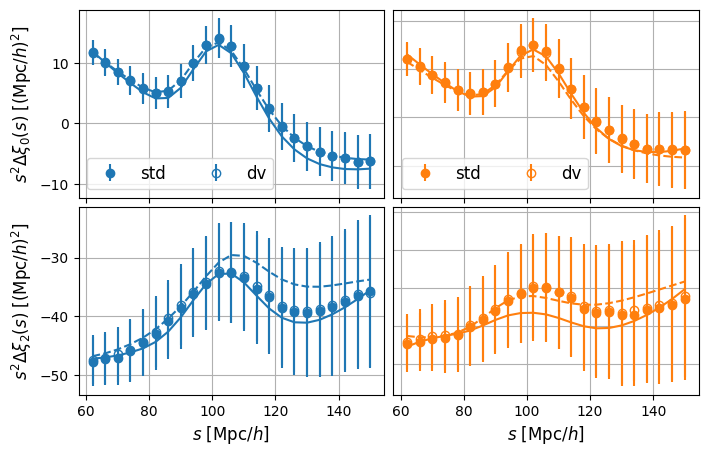

In [25]:
%matplotlib inline
burnin = 0.6

plt.rcParams['legend.fontsize'] = 12
lenfig = len(Z_VSMEAR[tracer])
if tracer == 'QSO':
    fig, ax = plt.subplots(1, lenfig, figsize = (lenfig*4,2.5), sharex=True)
    ax = np.array([ax])
    ax = ax[np.newaxis, :]
    ill = 1
else:
    fig, ax = plt.subplots(2, lenfig, figsize = (lenfig*4,5), sharex=True, gridspec_kw={'height_ratios': [1,1]})
    ill = 2
fig.subplots_adjust(wspace=0.03, hspace=0.05)
for i,(zmin, zmax) in enumerate(Z_VSMEAR[tracer]):
    z_eff = Z_CUBIC[tracer][i]
    for s,sys_model in enumerate(sys_models):
        linestyles = ['-', '--']
        plot_kwargs = {'color': f'C{i}', 'linestyle':linestyles[s], 'sys_model':sys_model, 'label':f'a'}
        data_args = {"tracer": tracer, "z_eff": z_eff, "zmin": zmin, "zmax": zmax, "recon": recon, "sys_model": sys_model, "grid_cosmo": "000"}
        fit_args = {"corr_type": 'xi', "bins_type": 'y3_sys', "cov_type": 'covbox', "recon": recon}
        likelihood, observable, _ = get_observable_likelihood(task, data_args, fit_args)
        chain_fn = base_dir+f'/BAO/chain_recon_{tracer}_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
        if tracer == 'QSO':
            chain = read_bao_chain(chain_fn, burnin = burnin, apmode = 'qiso')
        else:
            chain = read_bao_chain(chain_fn, burnin = burnin)
        likelihood(**chain.choice(index='argmax', return_type='dict', input=True))
        ax_top = ax[0][i]
        if tracer == 'QSO':
            ax_bottom = None
        else:
            ax_bottom = ax[1][i]
        plot_observable_bao(observable, ax_top, ax_bottom=ax_bottom, **plot_kwargs)
        if i>0:
            for ell in range(ill):
                ax[ell][i].tick_params(axis='y', which='both', left=False, labelleft=False)
                ax[ell][i].set_ylabel(None)

In [ ]:
tracer = 'LRG'
z = 0
(zmin, zmax) = Z_VSMEAR[tracer][z]
z_eff = Z_CUBIC[tracer][z]

sys_models = ['standard', 'dv-obs']
burnin = 0.6

for sys_model in sys_models:
    data_args = {"tracer": tracer, "z_eff": z_eff, "zmin": zmin, "zmax": zmax, "recon": recon, "sys_model": sys_model, "grid_cosmo": "000"}
    fit_args = {"corr_type": 'xi', "bins_type": 'y3_sys', "cov_type": 'covbox', "recon": recon}
    likelihood, observable, _ = get_observable_likelihood(task, data_args, fit_args)
    chain_fn = base_dir+f'/BAO/chain_recon_{tracer}_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    if tracer == 'QSO':
        chain = read_bao_chain(chain_fn, burnin = burnin, apmode = 'qiso')
    else:
        chain = read_bao_chain(chain_fn, burnin = burnin)
    # likelihood(**chain.choice(index='argmax', return_type='dict', input=True))
    print(chain.to_stats(tablefmt='pretty'))
    print('chi2:',-2*likelihood(**chain.choice(index='argmax', return_type='dict', input=True)))

CovRsf: 0.319
[000538.46] [0/1] 03-21 01:28  TracerCorrelationFunctionMultipolesObservable INFO     Loading 25 files [/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/LRG/obs_z0.4-0.6/AbacusSummit_base_c000_ph021/mpspk/xipoles_recon_LRG_z0.4-0.6_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/LRG/obs_z0.4-0.6/AbacusSummit_base_c000_ph017/mpspk/xipoles_recon_LRG_z0.4-0.6_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/LRG/obs_z0.4-0.6/AbacusSummit_base_c000_ph019/mpspk/xipoles_recon_LRG_z0.4-0.6_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/LRG/obs_z0.4-0.6/AbacusSummit_base_c000_ph020/mpspk/xipoles_recon_LRG_z0.4-0.6_standard.npy, ..., /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/LRG/obs_z0.4-0.6/AbacusSummit_base_c000_ph012/mpspk/xipoles_recon_LRG_z0.4-0.6_standard.npy].


/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000541.82] [0/1] 03-21 01:28  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.4-0.6_standard.npy.
+----------+---------+---------+---------+--------+-----------------+-----------------+
|          | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+----------+---------+---------+---------+--------+-----------------+-----------------+
|   qiso   |  0.998  |  0.998  |  0.998  | 0.011  |  -0.011/+0.011  |  -0.011/+0.011  |
|   qap    |  0.986  |  0.995  |  0.995  | 0.038  |  -0.038/+0.038  |  -0.039/+0.036  |
|    b1    |  1.91   |  1.90   |  1.90   |  0.15  |   -0.15/+0.15   |   -0.15/+0.14   |
|  dbeta   |  1.07   |  0.98   |  0.98   |  0.17  |   -0.20/+0.20   |   -0.28/+0.10   |
|  sigmas  |   2.9   |   2.1   |   2.1   |  2.0   |    -2.0/+1.9    |    -1.8/+2.1    |
| sigmapar |  5.93   |  6.22   |  6.22   |  0.96  |   -0.95/+0.95   |   -0.95/+0.95   |
| sigmaper |  3.17   |  3.10   |  3.10   |  0.99  |   

/global/homes/s/shengyu/.conda/envs/rc_env/lib/python3.9/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


[000565.82] [0/1] 03-21 01:29  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_LRG_z0.4-0.6_dv-obs.npy.
+----------+---------+---------+---------+--------+-----------------+-----------------+
|          | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+----------+---------+---------+---------+--------+-----------------+-----------------+
|   qiso   |  0.997  |  0.998  |  0.998  | 0.012  |  -0.011/+0.011  |  -0.011/+0.012  |
|   qap    |  1.004  |  0.995  |  0.994  | 0.040  |  -0.039/+0.039  |  -0.040/+0.038  |
|    b1    |  1.85   |  1.88   |  1.89   |  0.15  |   -0.15/+0.15   |   -0.15/+0.15   |
|  dbeta   |  0.89   |  0.99   |  0.99   |  0.17  |   -0.21/+0.21   |   -0.29/+0.11   |
|  sigmas  |   2.2   |   2.0   |   2.0   |  2.0   |    -2.0/+2.0    |    -1.9/+2.0    |
| sigmapar |  5.99   |  6.24   |  6.24   |  0.93  |   -0.93/+0.93   |   -0.92/+0.94   |
| sigmaper |  2.89   |  3.13   |  3.15   |  0.98  |   -0

[000749.32] [0/1] 03-21 01:32  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_QSO_z0.8-2.1_standard.npy.
[000749.35] [0/1] 03-21 01:32  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic/BAO/chain_recon_QSO_z0.8-2.1_dv-obs.npy.


Removed no burn in
Removed no burn in


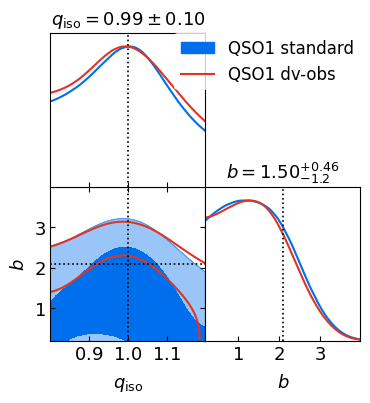

In [20]:
# plot the contour plot
# %config InlineBackend.figure_format = 'retina'
tracer = 'QSO'
z = 0
(zmin, zmax) = Z_VSMEAR[tracer][z]
z_eff = Z_CUBIC[tracer][z]
sys_models = ['standard', 'dv-obs']
burnin = 0.4

chains   = []
for sys_model in sys_models:
    # data_args = {"tracer": tracer, "z_eff": z_eff, "zmin": zmin, "zmax": zmax,
    #             "recon": recon, "sys_model": sysmodel, "grid_cosmo": "000"}
    # observable, likelihood = set_bao_likelihood(task, data_args)
    chain_fn = base_dir+f'/BAO/chain_recon_{tracer}_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    if tracer == 'QSO':
        chain = read_bao_chain(chain_fn, burnin = burnin,  slice_step = 60, apmode = 'qiso')
    else:
        chain = read_bao_chain(chain_fn, burnin = burnin,  slice_step = 60)
    chains.append(chain) 

g = plots.get_subplot_plotter()
if tracer in ['LRG','ELG']: 
    params  = ['qiso', 'qap', 'b1']
    _, bias, _ = GET_RECON_BIAS(tracer)
    true_values     = [1, 1, bias]
    g.settings.fig_width_inch= 8
    g.settings.legend_fontsize = 20
    g.settings.axes_labelsize = 20
if tracer in ['QSO','BGS']: 
    params  = ['qiso', 'b1']
    _, bias, _ = GET_RECON_BIAS(tracer)
    true_values     = [1, bias]
    # g.settings.fig_width_inch= 6
    g.settings.legend_fontsize = 15
    g.settings.axes_labelsize = 16
g.settings.axes_fontsize = 16
g.settings.figure_legend_frame = False
labels  = [f'{tracer}{z+1} standard', f'{tracer}{z+1} dv-obs']
plotting.plot_triangle(chains, title_limit=1, filled = True, params = params,
                        legend_labels = labels, legend_loc= 'upper right',
                        contour_lws = 1.5,
                        # contour_ls = lss, contour_lws = lws, contour_colors = colors, 
                        # param_limits=param_limits, 
                        smoothed=True, show=False, g=g)
for i in range(len(true_values)):
    for j in range(i+1):
        g.subplots[i,j].axvline(true_values[j], c = 'k', ls = ':', lw = 1.2)
        if i != j:
            g.subplots[i,j].axhline(true_values[i], c = 'k', ls = ':', lw = 1.2)

In [ ]:
def get_alpha_new(z, cosmo=None, eta=1. / 3.):
    from cosmoprimo.fiducial import DESI
    from cosmoprimo import constants
    fiducial = DESI()
    if cosmo is None: cosmo = DESI()
    def predict(cosmo):
        if type(cosmo) is list:
            hrdrag = cosmo[1]
            DM_over_rd = cosmo[0].comoving_angular_distance(z) / hrdrag
            DH_over_rd = (constants.c / 1e3) / (100. * cosmo[0].efunc(z)) / hrdrag
        else:
            DM_over_rd = cosmo.comoving_angular_distance(z) / cosmo.rs_drag #*cosmo.h
            DH_over_rd = (constants.c / 1e3) / (100. * cosmo.efunc(z)) / cosmo.rs_drag #*cosmo.h
        return DH_over_rd, DM_over_rd
    DH_over_rd, DM_over_rd = predict(cosmo)
    DH_over_rd_fid, DM_over_rd_fid = predict(fiducial)
    qpar = DH_over_rd / DH_over_rd_fid
    # if type(cosmo) is list:
    #     hrdrag = cosmo[1]
    #     qper = np.full_like(qpar, fiducial.rs_drag / hrdrag)
    # else:
    #     qper = np.full_like(qpar, fiducial.rs_drag / cosmo.rs_drag)
    # qper = np.ones_like(qpar)*qpar
    qper = np.ones_like(np.atleast_1d(qpar)) * qpar
    mask_z = z > 0.
    qper[mask_z] = DM_over_rd[mask_z] / DM_over_rd_fid[mask_z]
    qiso = qpar ** eta * qper ** (1. - eta)
    DV_over_rs = (DH_over_rd * z * DM_over_rd**2)**(1. / 3.)
    DH_over_DM = DH_over_rd / DM_over_rd
    qap= qpar / qper
    fap = qper / qpar
    #aparp = (1. / cosmo.rs_drag / cosmo.efunc(zp)) / (1. / fiducial.rs_drag / fiducial.efunc(zp)))
    return {'DV_over_rs': qiso, 'DH_over_DM': qap, 'DM_over_rs': qper, 'DH_over_rs': qpar,'DM_over_DH': fap}

def get_D_over_r(z, cosmo=None, eta=1. / 3.):
    from cosmoprimo.fiducial import DESI
    from cosmoprimo import constants
    fiducial = DESI()
    if cosmo is None: cosmo = DESI()
    if type(cosmo) is list:
        hrdrag = cosmo[1]
        DM_over_rd = cosmo[0].comoving_angular_distance(z) / hrdrag
        DH_over_rd = (constants.c / 1e3) / (100. * cosmo[0].efunc(z)) / hrdrag
    else:
        DM_over_rd = cosmo.comoving_angular_distance(z) / cosmo.rs_drag #*cosmo.h
        DH_over_rd = (constants.c / 1e3) / (100. * cosmo.efunc(z)) / cosmo.rs_drag #*cosmo.h
    DV_over_rs = (DH_over_rd * z * DM_over_rd**2)**(1. / 3.)
    DH_over_DM = DH_over_rd / DM_over_rd
    return {'DV_over_rs': DV_over_rs, 'DH_over_DM': DH_over_DM, 'DM_over_rs': DM_over_rd, 'DH_over_rs': DH_over_rd}


[000496.60] [0/1] 03-19 09:43  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic_test/BAO/chain_recon_LRG_z0.4-0.6_standard.npy.


<bound method BaseParameterCollection.params of Chain(shape=(5100, 64), params=ParameterCollection(['qiso', 'qap', 'b1', 'dbeta', 'sigmas', 'sigmapar', 'sigmaper', 'al2_0', 'al2_1', 'bl0_0', 'bl0_2', 'bl2_0', 'bl2_2', 'logposterior', 'al0_-1', 'al0_0', 'al0_1', 'al0_2', 'al2_-1', 'al2_2', 'DM_over_rd', 'DH_over_rd', 'DH_over_DM', 'DV_over_rd', 'loglikelihood', 'logprior', 'qpar', 'qper', 'alpha_iso', 'alpha_ap', 'alpha_par', 'alpha_per']))>
[000496.78] [0/1] 03-19 09:43  Chain                     INFO     Loading /pscratch/sd/s/shengyu/results/cubic_test/BAO/chain_recon_LRG_z0.4-0.6_standard.npy.
<bound method BaseParameterCollection.params of Chain(shape=(5100, 64), params=ParameterCollection(['qiso', 'qap', 'b1', 'dbeta', 'sigmas', 'sigmapar', 'sigmaper', 'al2_0', 'al2_1', 'bl0_0', 'bl0_2', 'bl2_0', 'bl2_2', 'logposterior', 'al0_-1', 'al0_0', 'al0_1', 'al0_2', 'al2_-1', 'al2_2', 'DM_over_rd', 'DH_over_rd', 'DH_over_DM', 'DV_over_rd', 'loglikelihood', 'logprior', 'qpar', 'qper', 'alph

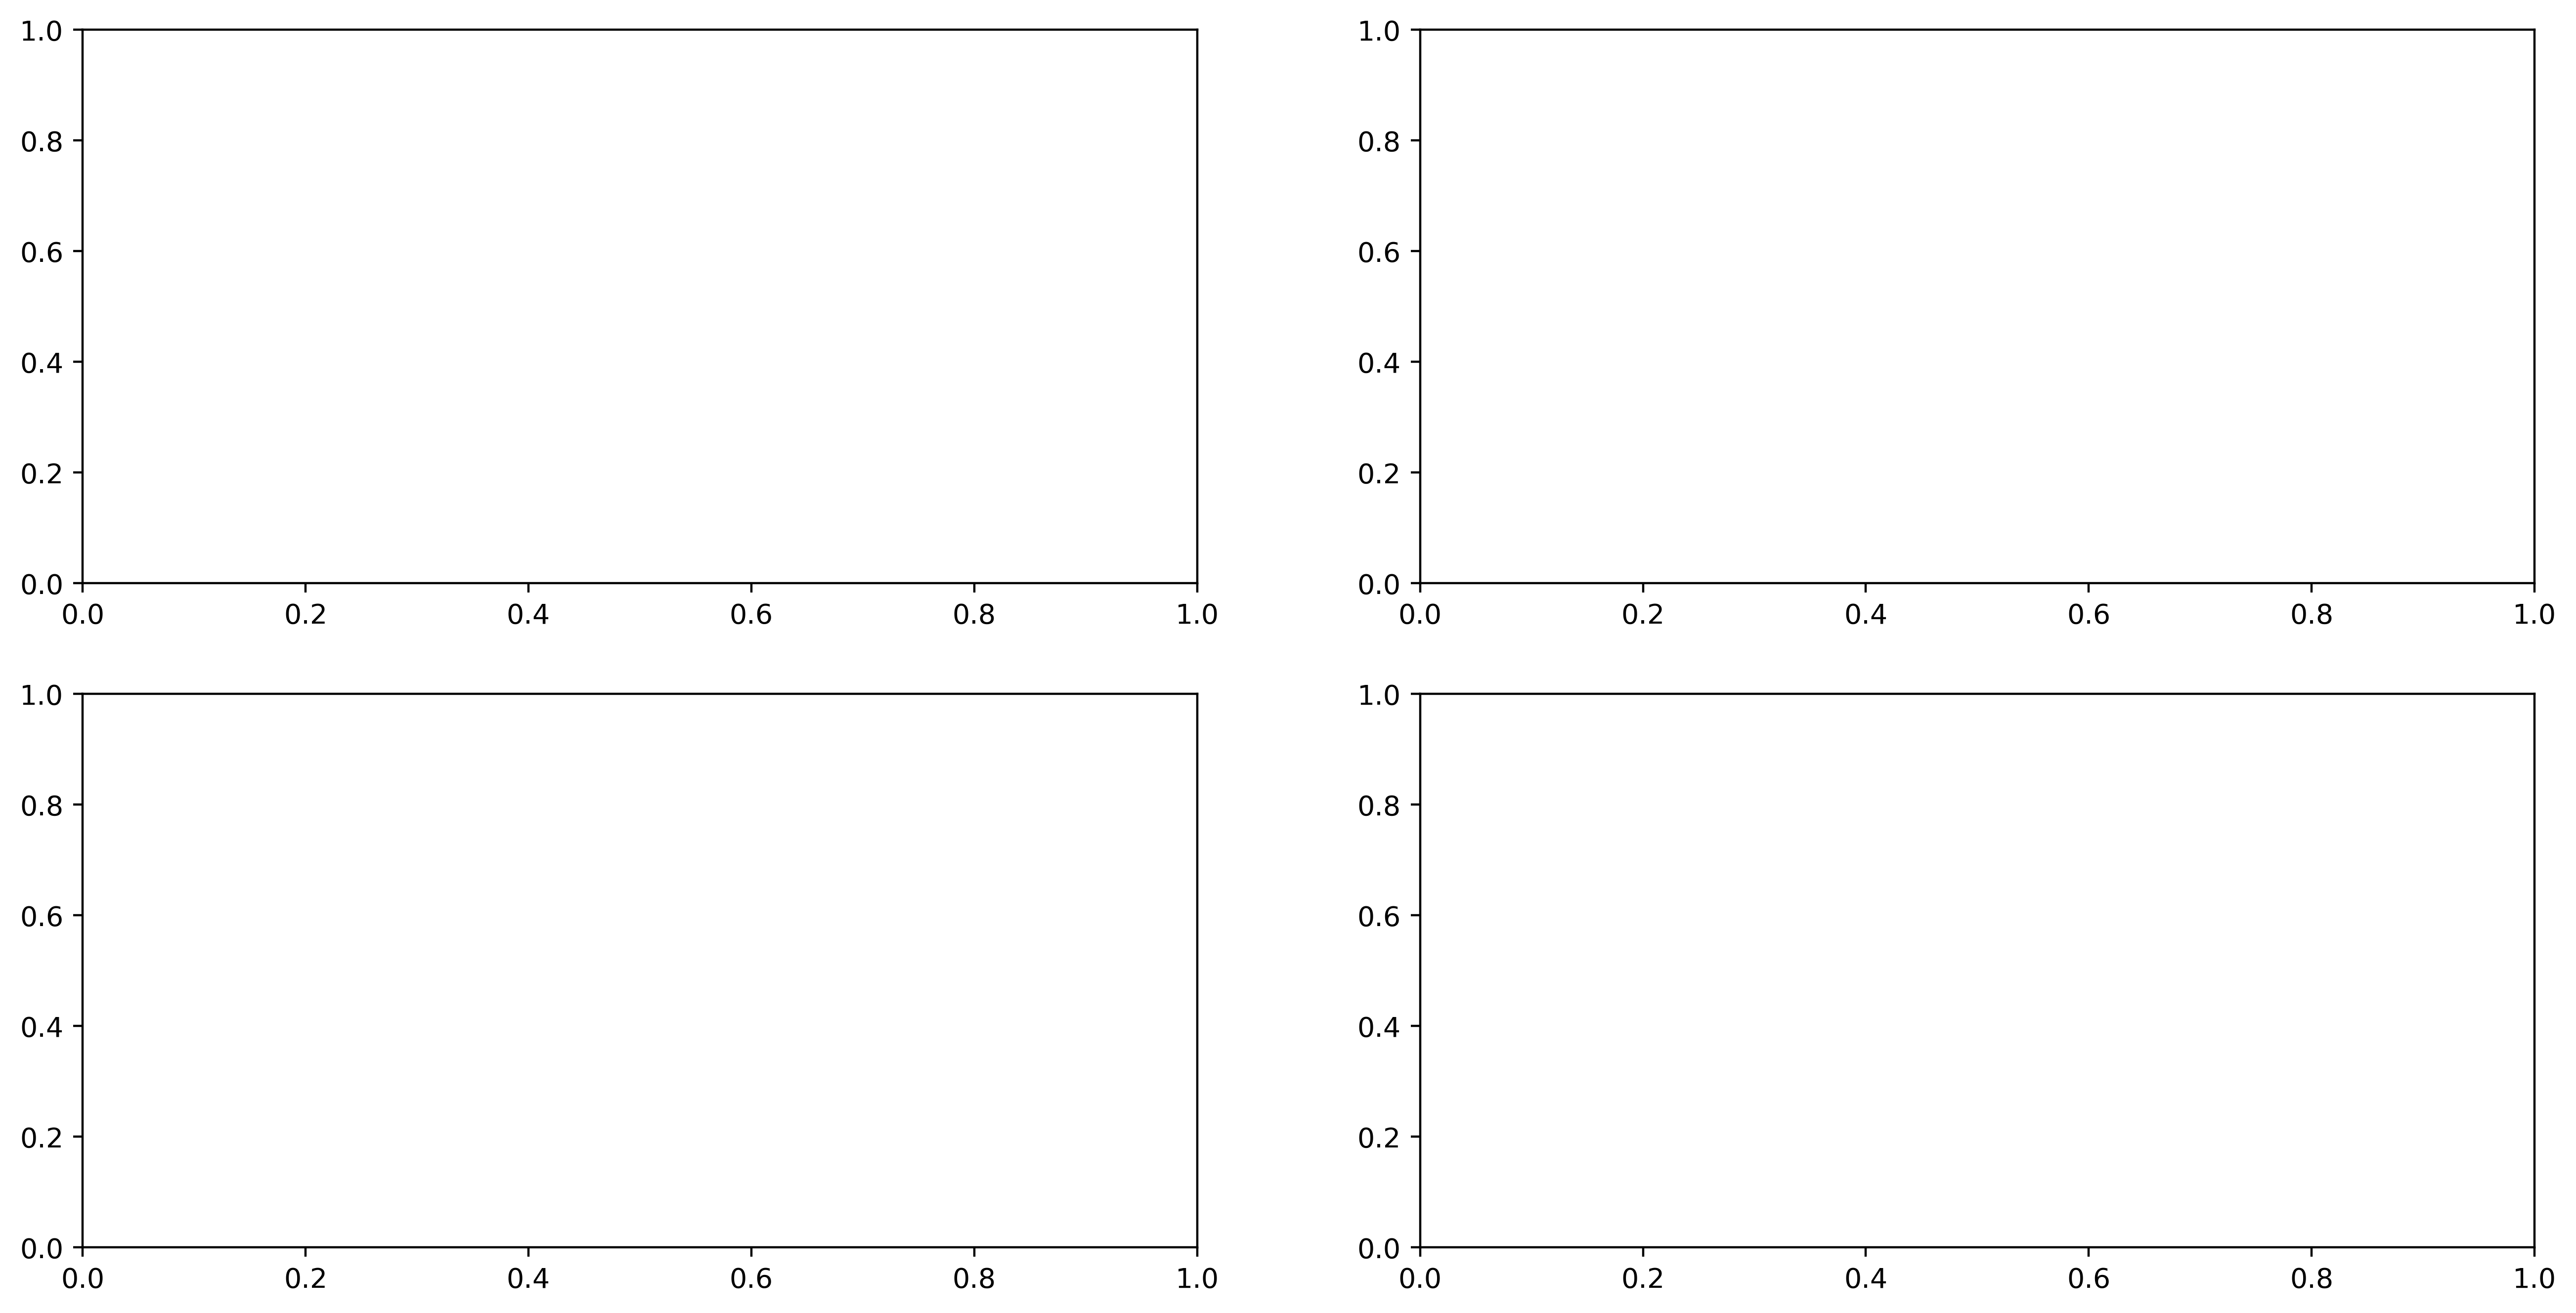

In [ ]:
tracer = 'LRG'
(zmin, zmax) = Z_VSMEAR[tracer][0]
sys_model = 'standard'

fig,ax=plt.subplots(2,2,figsize=(16,8),dpi=200)
zdense=np.geomspace(0.01,10,100)
for i,name in enumerate(['DV_over_rs','DM_over_DH','DM_over_rs','DH_over_rs']):
    chain_fn = base_dir+f'/BAO/chain_recon_{tracer}_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    chain = read_bao_chain(chain_fn)
    print(chain.params)
    colors_use=['orange','orangered', 'firebrick', 'slateblue', 'steelblue', 'purple']


    # ax[i//2,i%2].errorbar(z_use[j]+0.04, alpha_use[j],alpha_err_use[j], fmt='o',color=,mfc='white',capsize=4,ms=6,elinewidth=1.5,capthick=1.5,mew=1)


In [ ]:
print(chain['DM_over_rd'].mean())
print(chain['DM_over_rd'].std())

13.278344106938677
0.22379077562122124


ParameterArray(DM_over_rd, None, [[13.67501842 13.17540432 13.13190995 ... 13.49550357 13.1212705
  13.26895684]
 [13.67501842 13.17540432 13.13190995 ... 13.49550357 13.1212705
  13.26895684]
 [13.67501842 13.17540432 13.13190995 ... 13.39636787 13.1212705
  13.26170884]
 ...
 [13.34667371 13.44567106 13.31324438 ... 13.18292    13.12478358
  13.06268106]
 [13.34667371 13.33144454 13.2939849  ... 13.18292    13.13594391
  13.07172246]
 [13.34871127 13.26292966 13.2939849  ... 13.18292    13.13594391
  13.04507385]])

[000179.97] [0/1] 03-13 12:46  Chain                     INFO     Loading ../results/BAO/paper_prior/chain_recon_QSO_z0.8-1.1_standard.npy.
[000179.98] [0/1] 03-13 12:46  Chain                     INFO     Loading ../results/BAO/broad_prior/chain_recon_QSO_z0.8-1.1_standard.npy.


Removed no burn in
Removed no burn in
[000181.53] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000181.53] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000181.86] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000181.87] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000181.95] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000181.95] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000182.24] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000182.25] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[000182.99] [0/1] 03-13 12:46  matplotlib.mathtext       INFO     Substituting symbol \per

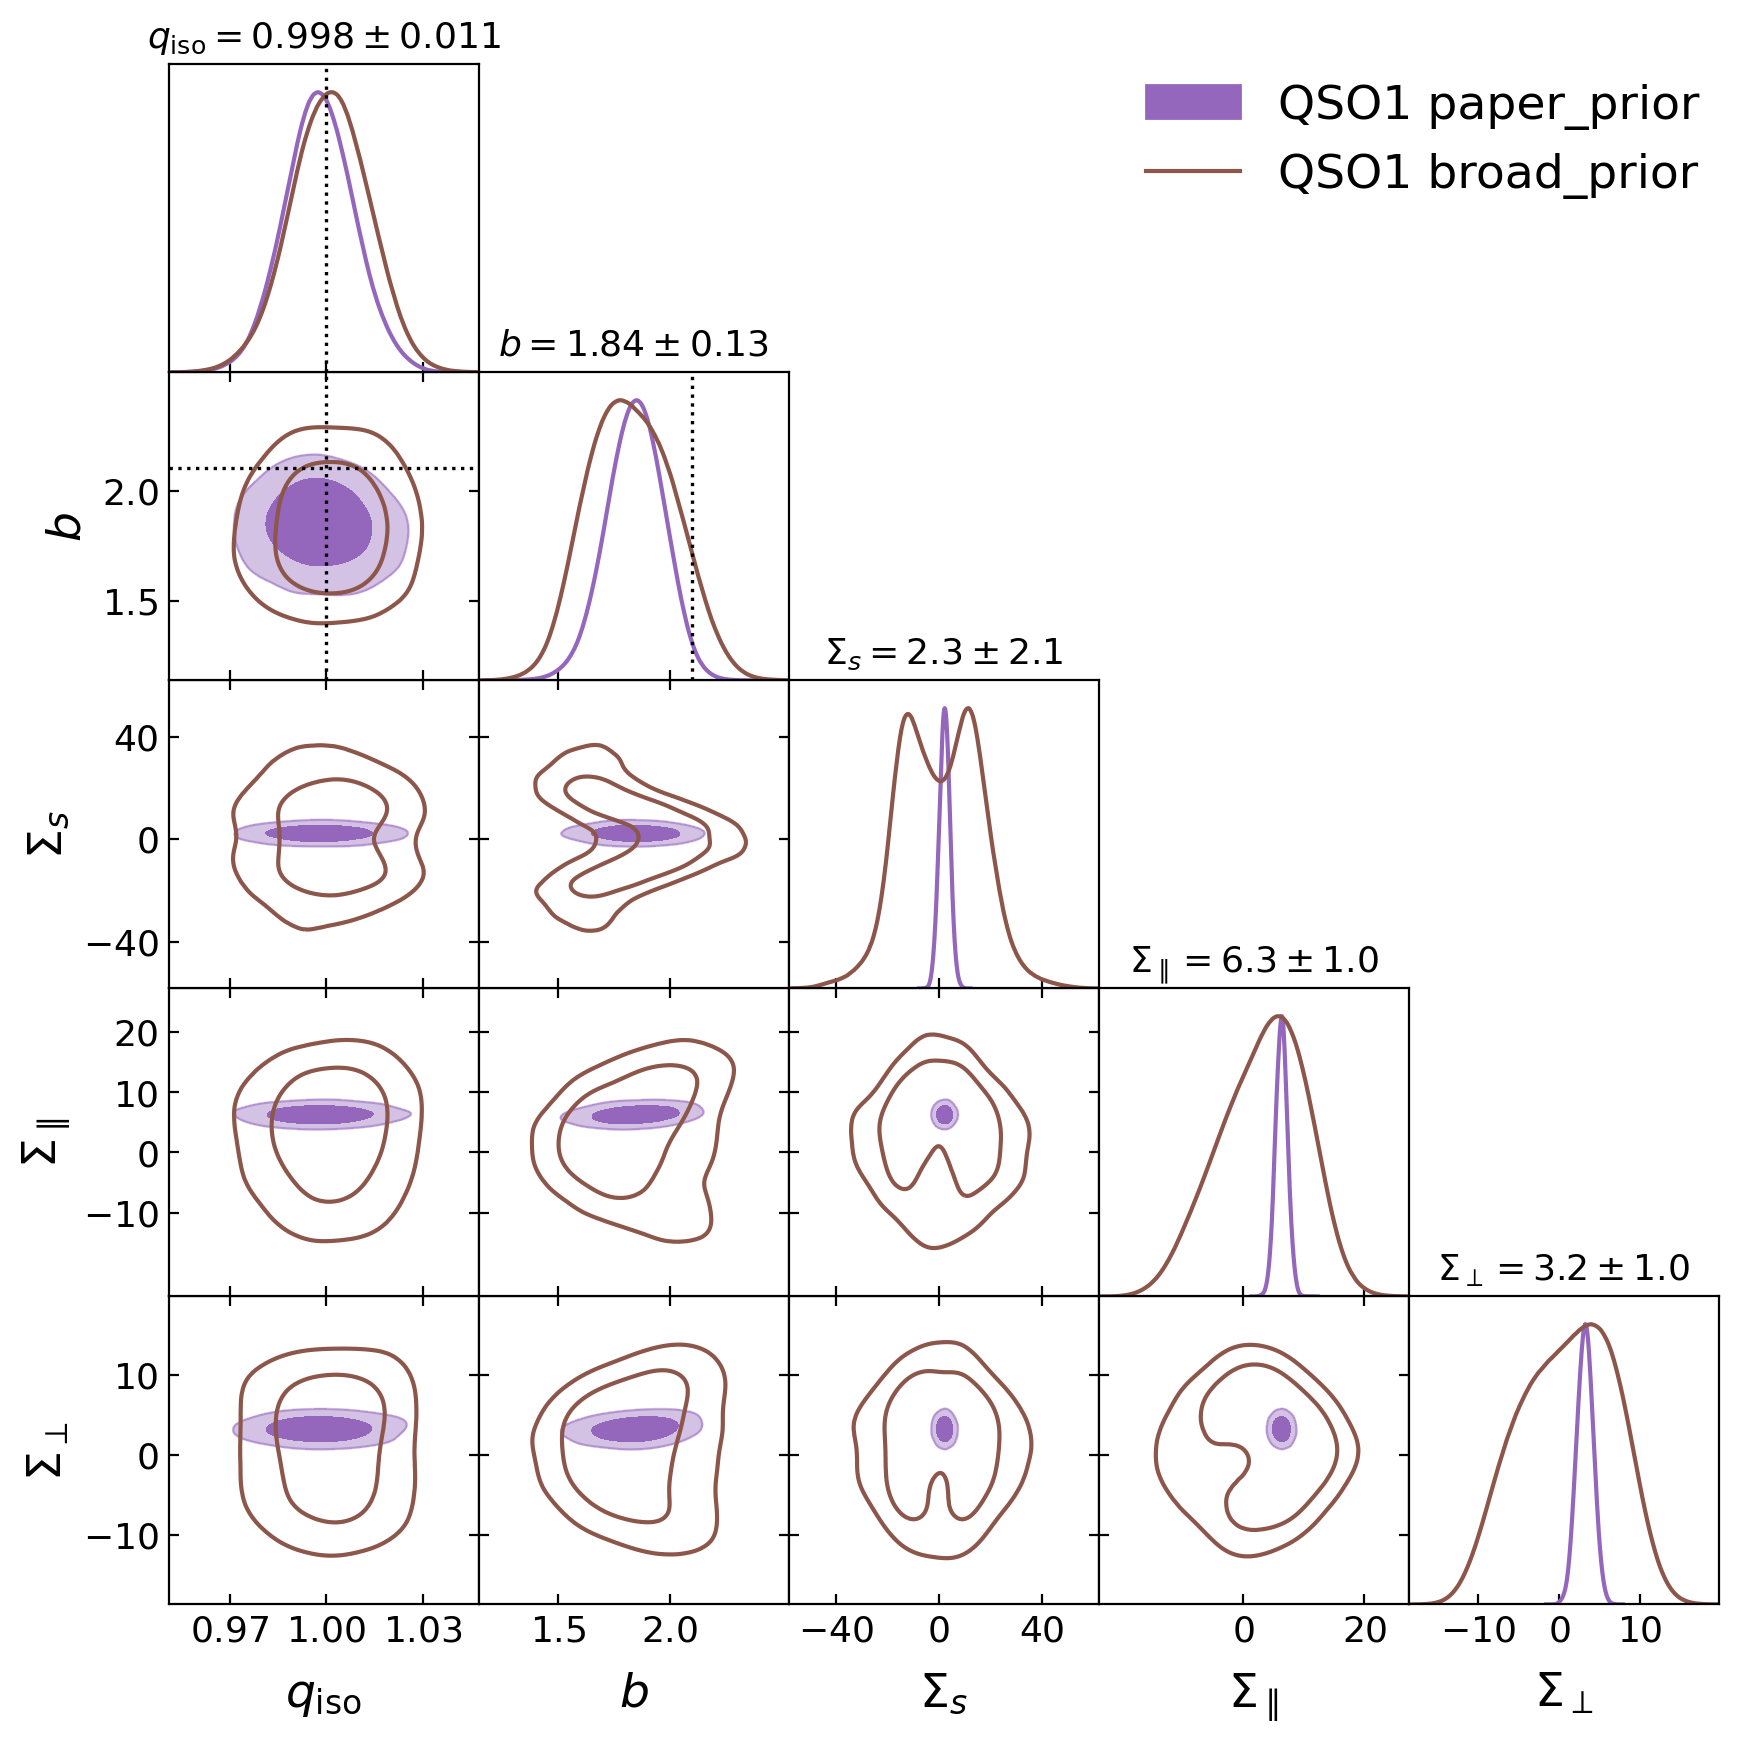

In [11]:
# plot the contour plot
tracer = 'QSO'
z = 0
(zmin, zmax) = Z_VSMEAR[tracer][z]
z_eff = Z_CUBIC[tracer][z]
sys_model = 'standard'
burnin = 0.5

chains   = []
priors = ['paper_prior', 'broad_prior']
for prior in priors:
    # data_args = {"tracer": tracer, "z_eff": z_eff, "zmin": zmin, "zmax": zmax,
    #             "recon": recon, "sys_model": sysmodel, "grid_cosmo": "000"}
    # observable, likelihood = set_bao_likelihood(task, data_args)
    chain_fn = f'../results/BAO/{prior}/chain_recon_{tracer}_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    if tracer == 'QSO':
        chain = read_bao_chain(chain_fn, burnin = burnin,  slice_step = 20, apmode = 'qiso')
        params  = ['qiso', 'b1', 'sigmas','sigmapar', 'sigmaper']
        true_values     = [1, bias]
    else:
        chain = read_bao_chain(chain_fn, burnin = burnin,  slice_step = 20)
        params  = ['qiso', 'qap', 'b1', 'sigmas','sigmapar', 'sigmaper']
        true_values     = [1, 1, bias]
    chains.append(chain) 

g = plots.get_subplot_plotter()
_, bias, _ = GET_RECON_BIAS(tracer)
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.settings.axes_fontsize = 16
g.settings.figure_legend_frame = False
labels  = [f'{tracer}{z+1} {priors[0]}', f'{tracer}{z+1} {priors[1]}']
plotting.plot_triangle(chains, title_limit=1, filled = True, params = params,
                        legend_labels = labels, legend_loc= 'upper right',
                        contour_lws = 1.5,
                        # contour_ls =lss, 
                        # contour_lws = lws, 
                        contour_colors = ['C4', 'C5'], 
                        # param_limits=param_limits, 
                        smoothed=True, show=False, g=g)
for i in range(len(true_values)):
    for j in range(i+1):
        g.subplots[i,j].axvline(true_values[j], c = 'k', ls = ':', lw = 1.2)
        if i != j:
            g.subplots[i,j].axhline(true_values[i], c = 'k', ls = ':', lw = 1.2)